In [5]:
##IMPORT PACKAGES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [106]:
##TURN THE DUPLICATED BEDGRAPH FILE FOR E5.5 INTO A DATAFRAME
df3=pd.read_csv("/Users/cmdb/qbb2021-answers/week4/SRR3083929_1.chr6_bismark_bt2_pe.deduplicated.bedGraph", sep="\t",comment='t',header=None)

In [107]:
##ASSIGN COLUMN NAMES FOR THE DATA FRAME, THE LAST COLUMN IS WHAT WE WILL BE WORKING WITH
df3.columns=["CHR",'START','END','SCORE']
df3

,CHR,START,END,SCORE
0,chr6,50000557,50000558,0.0
1,chr6,50000626,50000627,100.0
2,chr6,50000643,50000644,100.0
3,chr6,50001247,50001248,50.0
4,chr6,50001543,50001544,0.0
...,...,...,...,...
72815,chr6,59998824,59998825,50.0
72816,chr6,59999321,59999322,0.0
72817,chr6,59999436,59999437,0.0
72818,chr6,59999524,59999525,0.0


In [109]:
##SINCE WE WANT THE CUMULATIVE SUM OF THE SCORE COLUMN, I USED THE .CUMSUM FUNCTION TO ADDA UP ALL THE SCORES THROUGHOUT THE FILE
df3['CUMSUM_Score'] = df3['SCORE'].cumsum()
df3['CUMSUM_Score']

0        0.000000e+00
1        1.000000e+02
2        2.000000e+02
3        2.500000e+02
4        2.500000e+02
             ...     
72815    4.614425e+06
72816    4.614425e+06
72817    4.614425e+06
72818    4.614425e+06
72819    4.614425e+06
Name: CUMSUM_Score, Length: 72820, dtype: float64

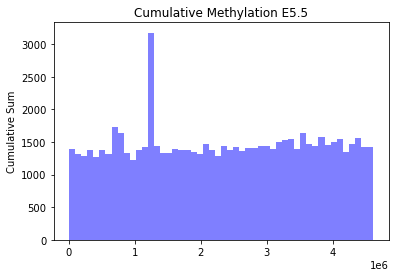

In [111]:
##PLOT THE CUMULATIVE SUM OF THE E5.5 FILE
x=df3['CUMSUM_Score']
fig,ax=plt.subplots()
ax.hist(x, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Cumulative Sum")
ax.set_title("Cumulative Methylation E5.5")
plt.show()

In [112]:
##TURN THE E4.0 BEDGRAPH FILE INTO A DATAFRAME
df4=pd.read_csv("/Users/cmdb/qbb2021-answers/week4/SRR3083926_1.chr6_bismark_bt2_pe.deduplicated.bedGraph", sep="\t",comment='t',header=None)

In [113]:
#ASSIGN COLUMN NAMES, SAME AS ABOVE
df4.columns=["CHR",'START','END','SCORE']
df4

,CHR,START,END,SCORE
0,chr6,49999926,49999927,0.000000
1,chr6,49999965,49999966,0.000000
2,chr6,50000074,50000075,0.000000
3,chr6,50000077,50000078,0.000000
4,chr6,50000556,50000557,0.000000
...,...,...,...,...
51623,chr6,59997276,59997277,0.000000
51624,chr6,59998070,59998071,33.333333
51625,chr6,59998551,59998552,0.000000
51626,chr6,59998824,59998825,0.000000


In [114]:
##USE THE .CUMSUM FUNCTION TO ADD ALL THE SCORES
df4['CUMSUM_Score'] = df4['SCORE'].cumsum()
df4['CUMSUM_Score']

0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
             ...      
51623    986221.113832
51624    986254.447165
51625    986254.447165
51626    986254.447165
51627    986254.447165
Name: CUMSUM_Score, Length: 51628, dtype: float64

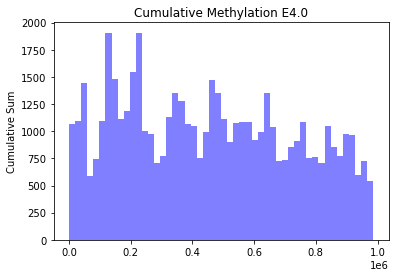

In [115]:
##PLOT THE CUMULATIVE SUMS
y=df4['CUMSUM_Score']
fig,ax=plt.subplots()
ax.hist(y, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Cumulative Sum")
ax.set_title("Cumulative Methylation E4.0")
plt.show()

In [ ]:
##Since we plan to create a scatter plot we need equal values in x and y, so I decided to take the 51628 rows from the scores section ans plot them against each other from the two dataframes.

In [128]:
E4= df4.loc[:51627,:]
E4

,CHR,START,END,SCORE,CUMSUM_Score
0,chr6,49999926,49999927,0.000000,0.000000
1,chr6,49999965,49999966,0.000000,0.000000
2,chr6,50000074,50000075,0.000000,0.000000
3,chr6,50000077,50000078,0.000000,0.000000
4,chr6,50000556,50000557,0.000000,0.000000
...,...,...,...,...,...
51623,chr6,59997276,59997277,0.000000,986221.113832
51624,chr6,59998070,59998071,33.333333,986254.447165
51625,chr6,59998551,59998552,0.000000,986254.447165
51626,chr6,59998824,59998825,0.000000,986254.447165


In [129]:
E5_5=df3.loc[:51627,:]
E5_5

,CHR,START,END,SCORE,CUMSUM_Score
0,chr6,50000557,50000558,0.0,0.000000e+00
1,chr6,50000626,50000627,100.0,1.000000e+02
2,chr6,50000643,50000644,100.0,2.000000e+02
3,chr6,50001247,50001248,50.0,2.500000e+02
4,chr6,50001543,50001544,0.0,2.500000e+02
...,...,...,...,...,...
51623,chr6,56449806,56449807,50.0,3.299225e+06
51624,chr6,56449864,56449865,100.0,3.299325e+06
51625,chr6,56449883,56449884,100.0,3.299425e+06
51626,chr6,56449884,56449885,50.0,3.299475e+06


In [134]:
a=E4.loc[:,'SCORE']

In [133]:
b=E5_5.loc[:,"SCORE"]

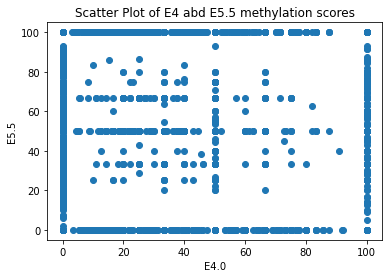

In [136]:
fig, ax = plt.subplots()
ax.scatter(a, b)
ax.set_title('Scatter Plot of E4 abd E5.5 methylation scores')
ax.set_xlabel("E4.0")
ax.set_ylabel("E5.5")
plt.show()

In [ ]:
##USING THE SCIPY PACKAGE DO A T-TEST COMPARING E4 AND E5_5 METHYLATION SCORES

In [124]:
from scipy import stats

In [137]:
stats.ttest_ind(E4["SCORE"],E5_5["SCORE"])

Ttest_indResult(statistic=-177.06178726638836, pvalue=0.0)

In [138]:
stats.ttest_ind(E5_5["SCORE"],E4["SCORE"])

Ttest_indResult(statistic=177.06178726638836, pvalue=0.0)